In [111]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import re

In [112]:
key_space = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_#'
key_space_dic = {}
for i in range(len(key_space)):
    key_space_dic[key_space[i]] = i
key_space_dic

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35,
 '_': 36,
 '#': 37}

In [113]:
cipher = ''
with open("Ciphertext_2.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        cipher += line
    print(type(cipher))
    print(len(cipher))

<class 'str'>
10500


# Frequency Analysis

[('E', 655), ('Q', 476), ('K', 435), ('0', 430), ('2', 424), ('8', 406), ('Y', 402), ('S', 371), ('U', 360), ('M', 358), ('W', 350), ('#', 304), ('F', 289), ('C', 287), ('J', 284), ('D', 282), ('6', 281), ('7', 278), ('P', 275), ('G', 268), ('I', 265), ('O', 265), ('1', 239), ('A', 239), ('X', 220), ('R', 202), ('V', 196), ('4', 194), ('B', 188), ('L', 187), ('T', 169), ('9', 154), ('_', 152), ('H', 149), ('5', 137), ('N', 137), ('3', 110), ('Z', 82)]


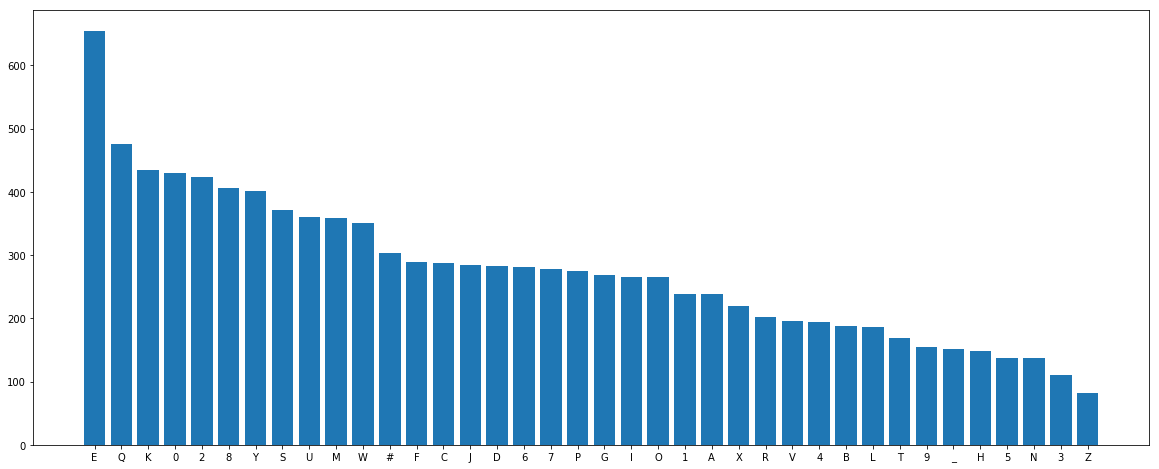

In [114]:
char_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_dic[key_char] = 0
for i in range(len(cipher)):
    char = cipher[i]
    char_dic[char] += 1
char_dic_sorted = sorted(char_dic.items(),key = lambda x:x[1],reverse = True)
char_dic_sorted
print(char_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_dic_sorted)):
    y_values.append(char_dic_sorted[i][1])
    x_values.append(char_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

In [143]:
cipher_sub = cipher[:2000]
repeat_list = []
while len(cipher_sub) > 100:
    cipher_sub=list(cipher_sub)
    cipher_sub.pop(1)
    cipher_sub=''.join(cipher_sub)
    words_list=re.findall(r'.{4}',cipher_sub)

    words_list_count=[0]*len(words_list)

    for i in range(len(words_list)):
            for j in range(len(words_list)):
                if(words_list[i]==words_list[j]):
                    words_list_count[i]=words_list_count[i]+1
    
    max_len=max(words_list_count)
    max_index = words_list_count.index(max(words_list_count))

    if words_list[max_index] not in repeat_list:
            if max_len==3:
                repeat_list.append(words_list[max_index])
                print("Repetitions:",max_len)
                print("Repeat Word:",words_list[max_index])
                print("\n")

Repetitions: 3
Repeat Word: ED7A


Repetitions: 3
Repeat Word: YXRU


Repetitions: 3
Repeat Word: XRUK


Repetitions: 3
Repeat Word: KIK0


Repetitions: 3
Repeat Word: EFGY


Repetitions: 3
Repeat Word: 14N0


Repetitions: 3
Repeat Word: 8710


Repetitions: 3
Repeat Word: E14N


Repetitions: 3
Repeat Word: LGSX


Repetitions: 3
Repeat Word: NVO6


Repetitions: 3
Repeat Word: RLOE


Repetitions: 3
Repeat Word: TMLM


Repetitions: 3
Repeat Word: SRLO


Repetitions: 3
Repeat Word: 710P


Repetitions: 3
Repeat Word: 10P0


Repetitions: 3
Repeat Word: MLM2


Repetitions: 3
Repeat Word: YSPE


Repetitions: 3
Repeat Word: QI_#


Repetitions: 3
Repeat Word: PE14


Repetitions: 3
Repeat Word: SPE1




In [144]:
def gcd(a,b):
    if a<b:
        a,b=b,a
    if a%b==0:
        return b
    else:
        return gcd(b,a%b)

def findIntervalLen(Ciphertext, word):
    interval_list=[]
    index = 0
    index_list = []
    while index < len(Ciphertext):
        index = Ciphertext.find(word,index)
        if index == -1:
            break
        index_list.append(index)
        index += 1
    print(index_list)
    for i in range(1, len(index_list)):
        interval=index_list[i]-index_list[i-1]
        print("Interval:",interval)
        interval_list.append(interval)
    print(interval_list)
    if len(interval_list) >= 2:
        interval_len=gcd(interval_list[0],interval_list[1])
    else:
        return -1
    print("Repeat Word:",word,"Maximum common divisor of intervals:",interval_len,"\n")
    return interval_len


In [165]:
max_convention = -1
for word in repeat_list:
    interval_len = findIntervalLen(cipher[:15000], word)
    if interval_len != -1:
        if max_convention == -1:
            max_convention = interval_len
        else:
            max_convention = gcd(max_convention, interval_len)
print("Greatest Common Divisor:", max_convention)
key_len = max_convention

[389, 1037, 1577, 3089, 3341, 4265, 4829, 4865, 5681, 5753, 7397, 7445, 7601, 9485, 9497]
Interval: 648
Interval: 540
Interval: 1512
Interval: 252
Interval: 924
Interval: 564
Interval: 36
Interval: 816
Interval: 72
Interval: 1644
Interval: 48
Interval: 156
Interval: 1884
Interval: 12
[648, 540, 1512, 252, 924, 564, 36, 816, 72, 1644, 48, 156, 1884, 12]
Repeat Word: ED7A Maximum common divisor of intervals: 108 

[98, 986, 1718, 2714, 3242, 3566, 3902, 4130, 4634, 4958, 5498, 8690, 8702, 8822]
Interval: 888
Interval: 732
Interval: 996
Interval: 528
Interval: 324
Interval: 336
Interval: 228
Interval: 504
Interval: 324
Interval: 540
Interval: 3192
Interval: 12
Interval: 120
[888, 732, 996, 528, 324, 336, 228, 504, 324, 540, 3192, 12, 120]
Repeat Word: YXRU Maximum common divisor of intervals: 12 

[99, 987, 1719, 2715, 3243, 3567, 3903, 4131, 4635, 4959, 5499, 8703]
Interval: 888
Interval: 732
Interval: 996
Interval: 528
Interval: 324
Interval: 336
Interval: 228
Interval: 504
Interval: 32

It shows that the greatest common factor is 12, so we can guess that the length of the key is 12.

In [166]:
key_len

12

In [167]:
group_char = ["" for groups in range(key_len)]

for i in range(len(cipher)):
    group_number = i % key_len
    group_char[group_number] += cipher[i]



## Key 1

[('M', 171), ('0', 90), ('4', 57), ('D', 53), ('9', 52), ('F', 51), ('A', 50), ('E', 45), ('Y', 43), ('3', 38), ('8', 29), ('7', 28), ('1', 24), ('#', 23), ('I', 19), ('_', 18), ('G', 17), ('B', 16), ('K', 15), ('Z', 9), ('6', 8), ('2', 6), ('H', 6), ('C', 4), ('J', 2), ('O', 1), ('5', 0), ('L', 0), ('N', 0), ('P', 0), ('Q', 0), ('R', 0), ('S', 0), ('T', 0), ('U', 0), ('V', 0), ('W', 0), ('X', 0)]


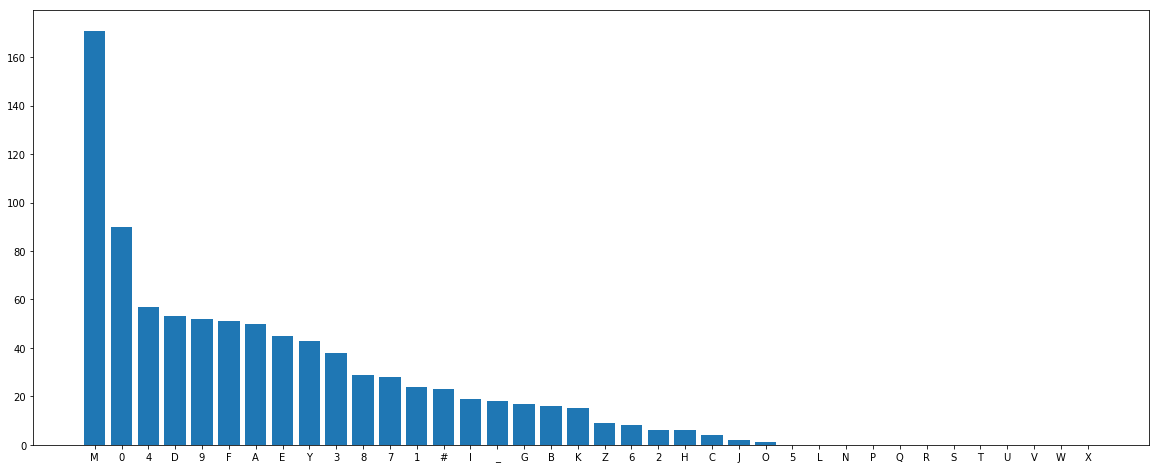

In [171]:
# for group_char[0] the first char shift
char_1_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_1_dic[key_char] = 0
for i in range(len(group_char[0])):
    char = group_char[0][i]
    char_1_dic[char] += 1
char_1_dic_sorted = sorted(char_1_dic.items(),key = lambda x:x[1],reverse = True)
char_1_dic_sorted
print(char_1_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_1_dic_sorted)):
    y_values.append(char_1_dic_sorted[i][1])
    x_values.append(char_1_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* M -> _
* 0 -> E
* Shift: 14

In [173]:
print(key_space_dic["M"])
print(key_space_dic["_"])
print(key_space_dic["0"])
print(key_space_dic["E"])

22
36
0
14


## Key 2

[('S', 150), ('6', 98), ('2', 58), ('L', 56), ('F', 51), ('K', 51), ('A', 50), ('G', 50), ('J', 43), ('9', 41), ('E', 30), ('5', 29), ('7', 24), ('D', 24), ('M', 24), ('4', 19), ('Q', 18), ('O', 15), ('3', 12), ('C', 7), ('H', 7), ('8', 5), ('N', 5), ('B', 2), ('I', 2), ('V', 2), ('P', 1), ('T', 1), ('0', 0), ('1', 0), ('R', 0), ('U', 0), ('W', 0), ('X', 0), ('Y', 0), ('Z', 0), ('_', 0), ('#', 0)]


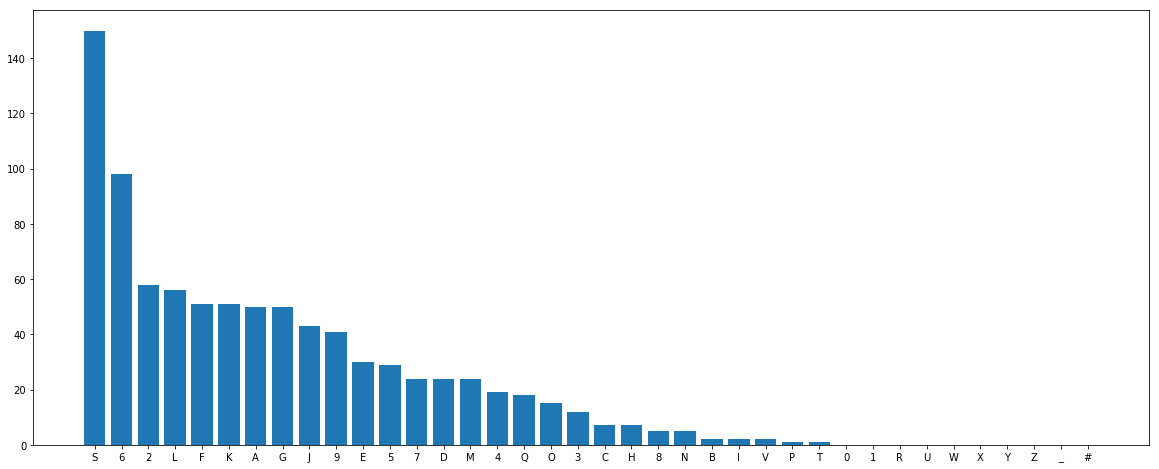

In [172]:
# for group_char[1] the second char shift
char_2_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_2_dic[key_char] = 0
for i in range(len(group_char[1])):
    char = group_char[1][i]
    char_2_dic[char] += 1
char_2_dic_sorted = sorted(char_2_dic.items(),key = lambda x:x[1],reverse = True)
char_2_dic_sorted
print(char_2_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_2_dic_sorted)):
    y_values.append(char_2_dic_sorted[i][1])
    x_values.append(char_2_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* S -> _
* 6 -> E
* Shift: 8

In [174]:
print(key_space_dic["S"])
print(key_space_dic["_"])
print(key_space_dic["6"])
print(key_space_dic["E"])

28
36
6
14


## Key 3

[('Y', 171), ('C', 94), ('M', 67), ('G', 63), ('R', 61), ('8', 54), ('Q', 53), ('L', 47), ('P', 40), ('F', 33), ('J', 30), ('D', 22), ('S', 19), ('B', 18), ('U', 18), ('K', 15), ('W', 14), ('A', 12), ('E', 11), ('N', 11), ('9', 9), ('I', 6), ('T', 2), ('V', 2), ('0', 1), ('3', 1), ('O', 1), ('1', 0), ('2', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('H', 0), ('X', 0), ('Z', 0), ('_', 0), ('#', 0)]


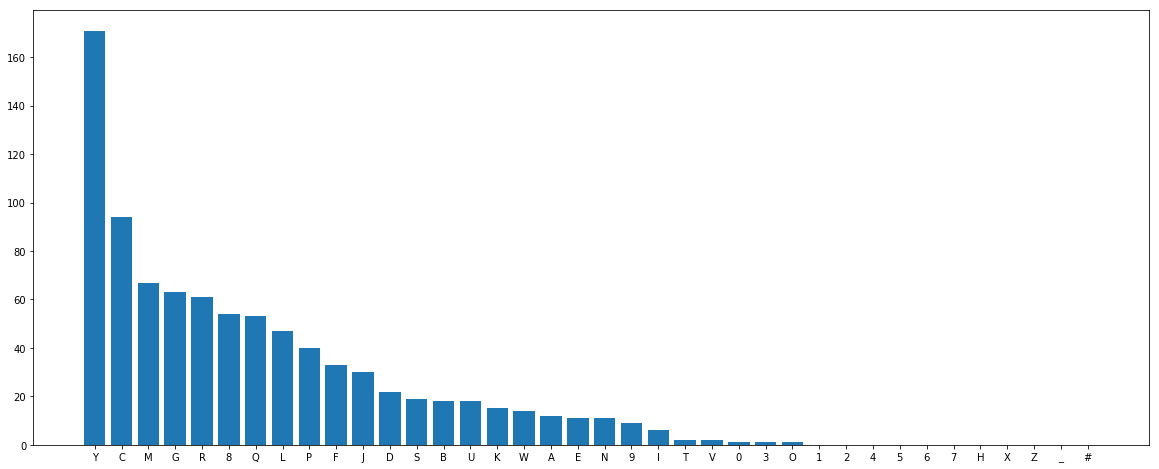

In [186]:
char_3_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_3_dic[key_char] = 0
for i in range(len(group_char[2])):
    char = group_char[2][i]
    char_3_dic[char] += 1
char_3_dic_sorted = sorted(char_3_dic.items(),key = lambda x:x[1],reverse = True)
char_3_dic_sorted
print(char_3_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_3_dic_sorted)):
    y_values.append(char_3_dic_sorted[i][1])
    x_values.append(char_3_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* Y -> _
* C -> E
* Shift: 2

In [187]:
print(key_space_dic["Y"])
print(key_space_dic["_"])
print(key_space_dic["C"])
print(key_space_dic["E"])

34
36
12
14


## Key 4

[('2', 157), ('I', 92), ('X', 72), ('S', 53), ('W', 50), ('E', 49), ('L', 47), ('P', 45), ('M', 42), ('V', 40), ('R', 39), ('H', 28), ('Q', 22), ('G', 21), ('Y', 20), ('0', 18), ('_', 17), ('J', 16), ('T', 13), ('Z', 9), ('F', 8), ('K', 8), ('O', 6), ('1', 1), ('7', 1), ('U', 1), ('3', 0), ('4', 0), ('5', 0), ('6', 0), ('8', 0), ('9', 0), ('A', 0), ('B', 0), ('C', 0), ('D', 0), ('N', 0), ('#', 0)]


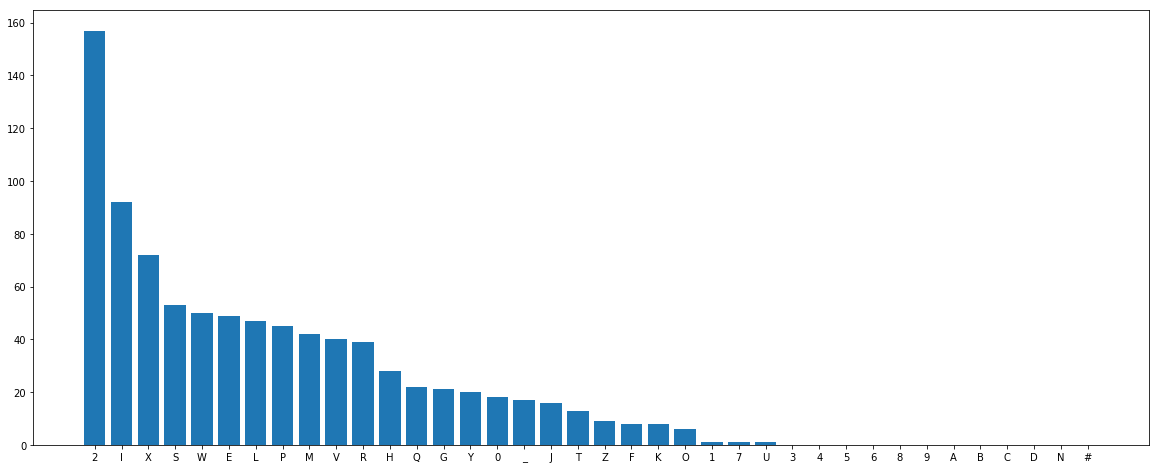

In [188]:
char_4_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_4_dic[key_char] = 0
for i in range(len(group_char[3])):
    char = group_char[3][i]
    char_4_dic[char] += 1
char_4_dic_sorted = sorted(char_4_dic.items(),key = lambda x:x[1],reverse = True)
char_4_dic_sorted
print(char_4_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_4_dic_sorted)):
    y_values.append(char_4_dic_sorted[i][1])
    x_values.append(char_4_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* 2 -> _
* I -> E
* Shift: 34

In [189]:
print(key_space_dic["2"])
print(key_space_dic["_"])
print(key_space_dic["I"])
print(key_space_dic["E"])

2
36
18
14


## Key 5

[('8', 171), ('O', 113), ('1', 61), ('R', 54), ('K', 53), ('X', 48), ('#', 47), ('S', 45), ('Y', 42), ('0', 40), ('V', 27), ('P', 24), ('2', 21), ('N', 21), ('W', 18), ('L', 15), ('4', 13), ('3', 12), ('Q', 11), ('M', 10), ('6', 9), ('Z', 9), ('U', 5), ('T', 2), ('5', 1), ('7', 1), ('B', 1), ('E', 1), ('9', 0), ('A', 0), ('C', 0), ('D', 0), ('F', 0), ('G', 0), ('H', 0), ('I', 0), ('J', 0), ('_', 0)]


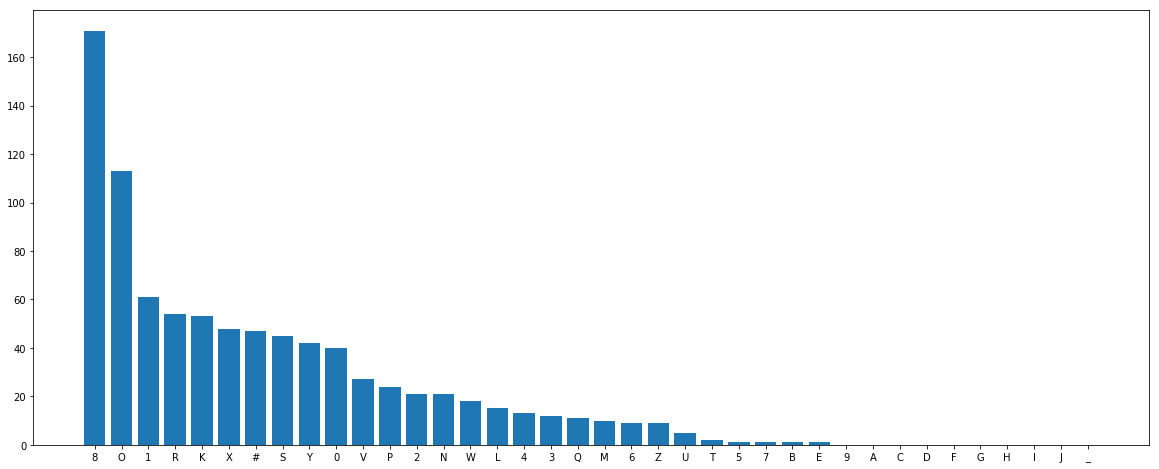

In [190]:
char_5_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_5_dic[key_char] = 0
for i in range(len(group_char[4])):
    char = group_char[4][i]
    char_5_dic[char] += 1
char_5_dic_sorted = sorted(char_5_dic.items(),key = lambda x:x[1],reverse = True)
char_5_dic_sorted
print(char_5_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_5_dic_sorted)):
    y_values.append(char_5_dic_sorted[i][1])
    x_values.append(char_5_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* 8 -> _
* O -> E
* Shift: 28

In [191]:
print(key_space_dic["8"])
print(key_space_dic["_"])
print(key_space_dic["O"])
print(key_space_dic["E"])

8
36
24
14


## Key 6

[('E', 167), ('U', 92), ('7', 62), ('Q', 62), ('1', 59), ('2', 59), ('Y', 51), ('6', 43), ('X', 33), ('T', 30), ('#', 29), ('0', 27), ('5', 27), ('S', 23), ('V', 20), ('8', 19), ('A', 15), ('C', 13), ('W', 12), ('9', 9), ('R', 9), ('3', 7), ('H', 2), ('_', 2), ('B', 1), ('J', 1), ('L', 1), ('4', 0), ('D', 0), ('F', 0), ('G', 0), ('I', 0), ('K', 0), ('M', 0), ('N', 0), ('O', 0), ('P', 0), ('Z', 0)]


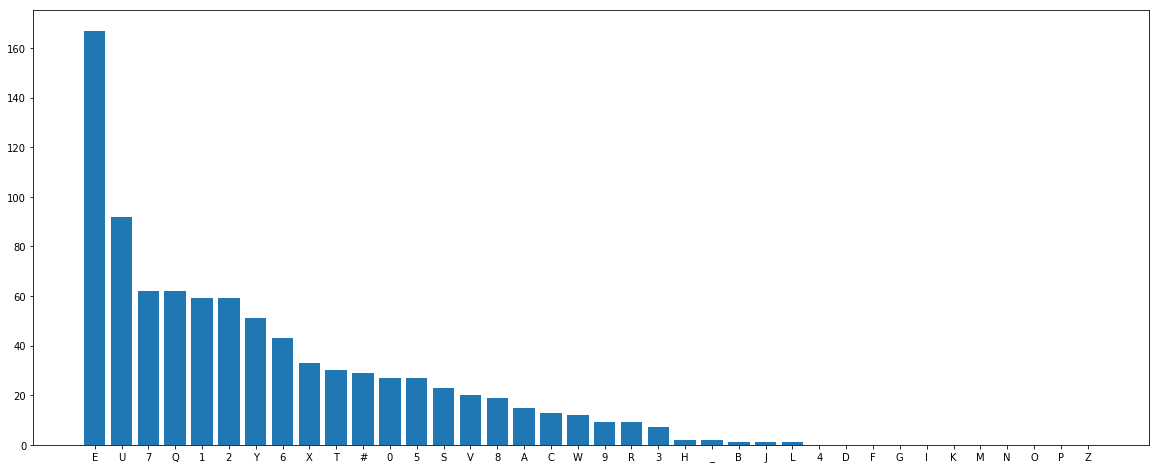

In [192]:
char_6_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_6_dic[key_char] = 0
for i in range(len(group_char[5])):
    char = group_char[5][i]
    char_6_dic[char] += 1
char_6_dic_sorted = sorted(char_6_dic.items(),key = lambda x:x[1],reverse = True)
char_6_dic_sorted
print(char_6_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_6_dic_sorted)):
    y_values.append(char_6_dic_sorted[i][1])
    x_values.append(char_6_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* E -> _
* U -> E
* Shift: 22

In [194]:
print(key_space_dic["E"])
print(key_space_dic["_"])
print(key_space_dic["U"])
print(key_space_dic["E"])

14
36
30
14


## Key 7

[('K', 170), ('_', 94), ('D', 70), ('8', 55), ('7', 52), ('2', 50), ('C', 49), ('1', 44), ('W', 41), ('B', 39), ('Z', 25), ('5', 24), ('#', 23), ('6', 21), ('E', 21), ('I', 15), ('Y', 15), ('G', 13), ('9', 12), ('X', 11), ('F', 10), ('0', 8), ('4', 7), ('H', 2), ('3', 1), ('O', 1), ('S', 1), ('T', 1), ('A', 0), ('J', 0), ('L', 0), ('M', 0), ('N', 0), ('P', 0), ('Q', 0), ('R', 0), ('U', 0), ('V', 0)]


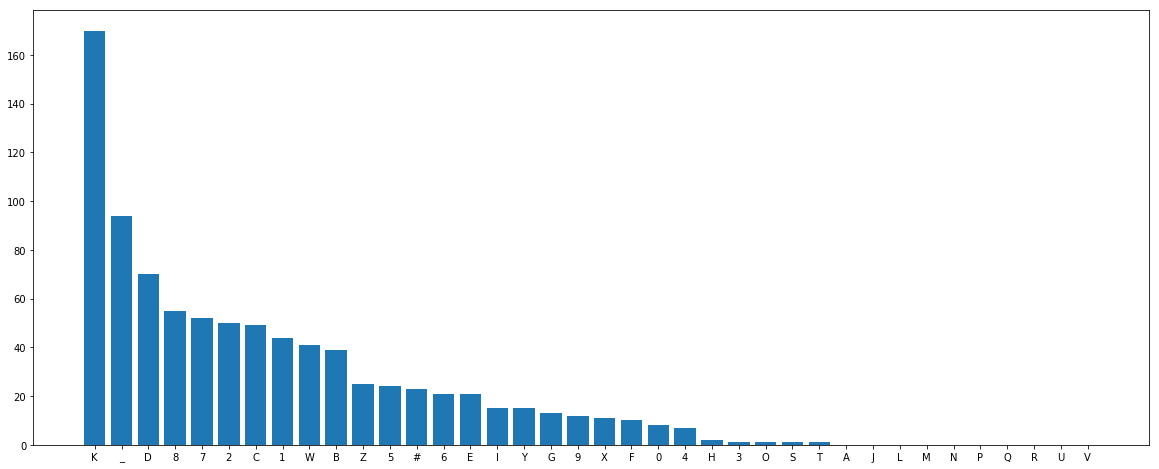

In [195]:
char_7_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_7_dic[key_char] = 0
for i in range(len(group_char[6])):
    char = group_char[6][i]
    char_7_dic[char] += 1
char_7_dic_sorted = sorted(char_7_dic.items(),key = lambda x:x[1],reverse = True)
char_7_dic_sorted
print(char_7_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_7_dic_sorted)):
    y_values.append(char_7_dic_sorted[i][1])
    x_values.append(char_7_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* K -> _
* _ -> E
* Shift: 16

In [196]:
print(key_space_dic["K"])
print(key_space_dic["_"])
print(key_space_dic["_"])
print(key_space_dic["E"])

20
36
36
14


## Key 8

[('Q', 165), ('4', 97), ('J', 70), ('0', 55), ('D', 54), ('7', 49), ('I', 49), ('E', 45), ('8', 42), ('H', 40), ('B', 32), ('3', 27), ('C', 25), ('2', 18), ('O', 18), ('5', 17), ('K', 16), ('M', 13), ('F', 12), ('6', 10), ('1', 8), ('L', 5), ('A', 3), ('N', 2), ('9', 1), ('T', 1), ('Z', 1), ('G', 0), ('P', 0), ('R', 0), ('S', 0), ('U', 0), ('V', 0), ('W', 0), ('X', 0), ('Y', 0), ('_', 0), ('#', 0)]


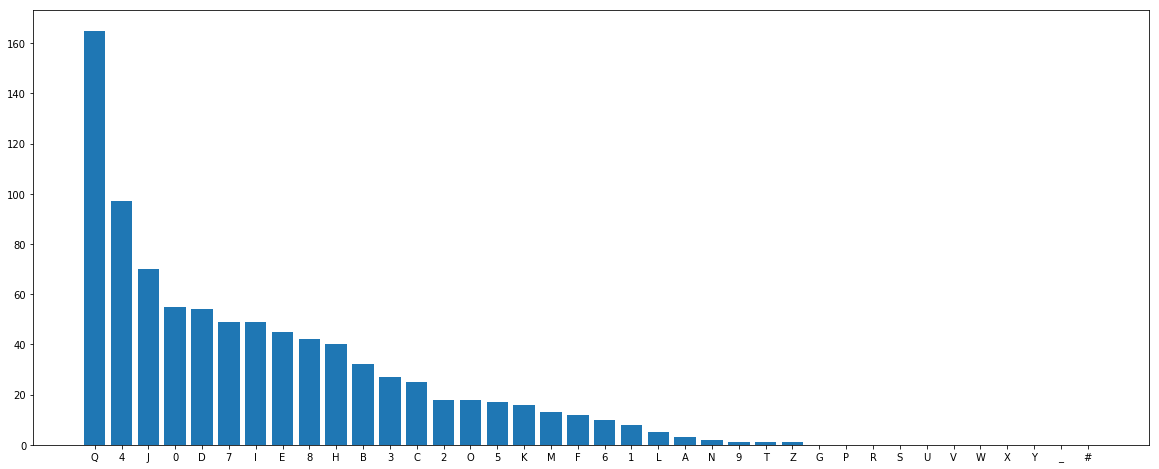

In [197]:
char_8_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_8_dic[key_char] = 0
for i in range(len(group_char[7])):
    char = group_char[7][i]
    char_8_dic[char] += 1
char_8_dic_sorted = sorted(char_8_dic.items(),key = lambda x:x[1],reverse = True)
char_8_dic_sorted
print(char_8_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_8_dic_sorted)):
    y_values.append(char_8_dic_sorted[i][1])
    x_values.append(char_8_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* Q -> _
* 4 -> E
* Shift: 10

In [198]:
print(key_space_dic["Q"])
print(key_space_dic["_"])
print(key_space_dic["4"])
print(key_space_dic["E"])

26
36
4
14


## Key 9

[('W', 180), ('A', 96), ('K', 56), ('P', 53), ('E', 52), ('6', 50), ('N', 45), ('J', 43), ('O', 38), ('D', 35), ('H', 31), ('U', 26), ('9', 24), ('I', 23), ('B', 20), ('Q', 20), ('8', 17), ('S', 16), ('L', 15), ('C', 10), ('R', 9), ('7', 7), ('G', 4), ('F', 2), ('4', 1), ('M', 1), ('Y', 1), ('0', 0), ('1', 0), ('2', 0), ('3', 0), ('5', 0), ('T', 0), ('V', 0), ('X', 0), ('Z', 0), ('_', 0), ('#', 0)]


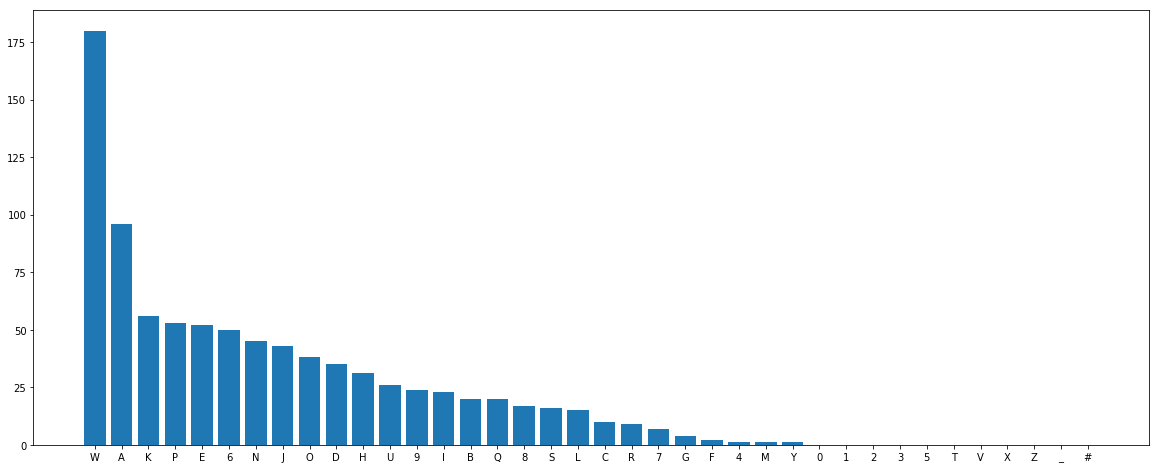

In [200]:
char_9_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_9_dic[key_char] = 0
for i in range(len(group_char[8])):
    char = group_char[8][i]
    char_9_dic[char] += 1
char_9_dic_sorted = sorted(char_9_dic.items(),key = lambda x:x[1],reverse = True)
print(char_9_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_9_dic_sorted)):
    y_values.append(char_9_dic_sorted[i][1])
    x_values.append(char_9_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* W -> _
* A -> E
* Shift: 4

In [201]:
print(key_space_dic["W"])
print(key_space_dic["_"])
print(key_space_dic["A"])
print(key_space_dic["E"])

32
36
10
14


## Key 10

[('0', 168), ('V', 75), ('G', 74), ('C', 58), ('P', 57), ('Q', 55), ('K', 51), ('T', 43), ('U', 41), ('J', 36), ('N', 30), ('O', 29), ('F', 27), ('H', 18), ('R', 18), ('_', 18), ('I', 15), ('W', 15), ('Y', 15), ('E', 12), ('D', 7), ('X', 5), ('M', 4), ('Z', 2), ('B', 1), ('L', 1), ('1', 0), ('2', 0), ('3', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('8', 0), ('9', 0), ('A', 0), ('S', 0), ('#', 0)]


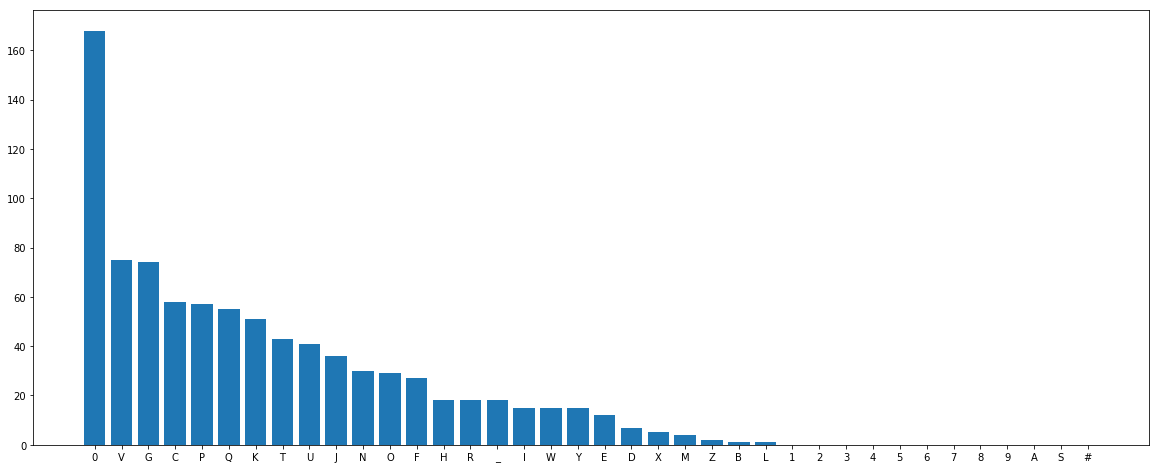

In [202]:
char_10_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_10_dic[key_char] = 0
for i in range(len(group_char[9])):
    char = group_char[9][i]
    char_10_dic[char] += 1
char_10_dic_sorted = sorted(char_10_dic.items(),key = lambda x:x[1],reverse = True)
print(char_10_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_10_dic_sorted)):
    y_values.append(char_10_dic_sorted[i][1])
    x_values.append(char_10_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* 0 -> _
* G -> E
* Shift: 36

In [205]:
print(key_space_dic["0"])
print(key_space_dic["_"])
print(key_space_dic["G"])
print(key_space_dic["E"])
print(key_space_dic["V"])
print(key_space_dic["T"])

0
36
16
14
31
29


## Key 11

[('#', 155), ('F', 95), ('U', 61), ('B', 56), ('P', 55), ('T', 51), ('S', 47), ('I', 44), ('J', 43), ('O', 43), ('G', 26), ('M', 26), ('E', 25), ('Z', 25), ('N', 23), ('Q', 18), ('V', 17), ('D', 16), ('H', 15), ('C', 12), ('X', 12), ('W', 9), ('R', 1), ('0', 0), ('1', 0), ('2', 0), ('3', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('8', 0), ('9', 0), ('A', 0), ('K', 0), ('L', 0), ('Y', 0), ('_', 0)]


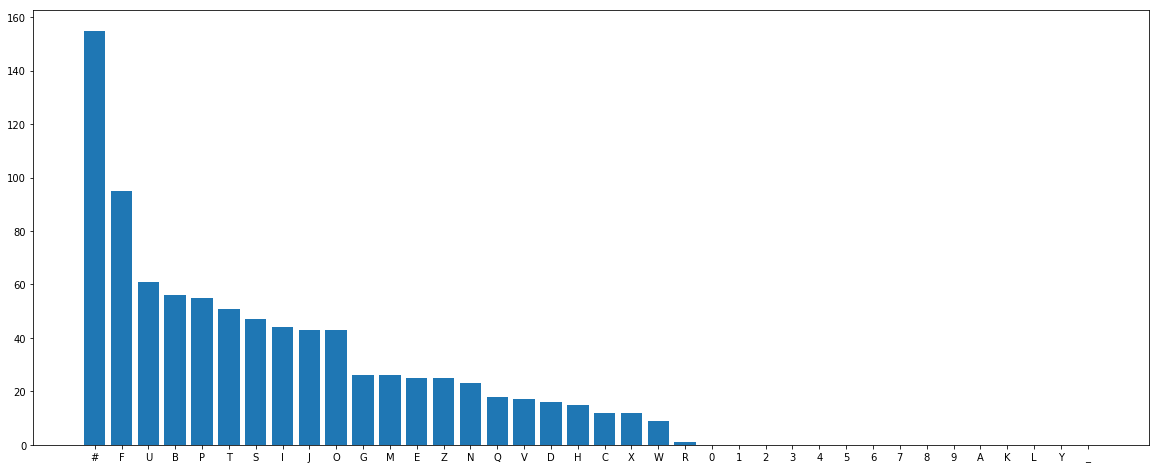

In [206]:
char_11_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_11_dic[key_char] = 0
for i in range(len(group_char[10])):
    char = group_char[10][i]
    char_11_dic[char] += 1
char_11_dic_sorted = sorted(char_11_dic.items(),key = lambda x:x[1],reverse = True)
print(char_11_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_11_dic_sorted)):
    y_values.append(char_11_dic_sorted[i][1])
    x_values.append(char_11_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* \# -> _
* F -> E
* Shift: 37

In [207]:
print(key_space_dic["#"])
print(key_space_dic["_"])
print(key_space_dic["F"])
print(key_space_dic["E"])

37
36
15
14


## Key 12

[('E', 197), ('U', 116), ('2', 55), ('7', 54), ('Q', 52), ('Y', 44), ('1', 42), ('6', 42), ('5', 39), ('X', 39), ('#', 27), ('T', 25), ('0', 23), ('S', 17), ('C', 15), ('8', 14), ('A', 13), ('V', 13), ('3', 12), ('R', 11), ('W', 11), ('9', 6), ('_', 3), ('B', 2), ('Z', 2), ('D', 1), ('4', 0), ('F', 0), ('G', 0), ('H', 0), ('I', 0), ('J', 0), ('K', 0), ('L', 0), ('M', 0), ('N', 0), ('O', 0), ('P', 0)]


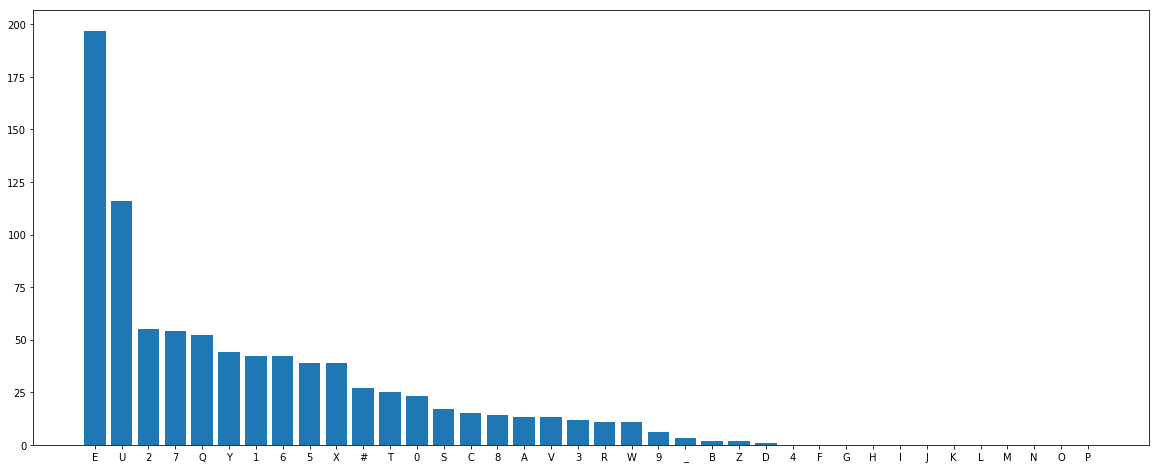

In [208]:
char_12_dic = {}
for i in range(len(key_space)):
    key_char = key_space[i]
    char_12_dic[key_char] = 0
for i in range(len(group_char[11])):
    char = group_char[11][i]
    char_12_dic[char] += 1
char_12_dic_sorted = sorted(char_12_dic.items(),key = lambda x:x[1],reverse = True)
print(char_12_dic_sorted)

x_values = []
y_values = []
for i in range(len(char_12_dic_sorted)):
    y_values.append(char_12_dic_sorted[i][1])
    x_values.append(char_12_dic_sorted[i][0])
plt.figure(figsize=(20, 8))
plt.bar(x_values, y_values)

plt.show()

* E -> _
* U -> E
* Shift: 22

In [209]:
print(key_space_dic["E"])
print(key_space_dic["_"])
print(key_space_dic["U"])
print(key_space_dic["E"])

14
36
30
14


In [213]:
# to summarize
shift_list = []
for i in range(key_len):

    char_frequence_dic = {}
    for j in range(len(key_space)):
        key_char = key_space[j]
        char_frequence_dic[key_char] = 0
    
    for k in range(len(group_char[i])):
        char = group_char[i][k]
        char_frequence_dic[char] += 1
    char_frequence_dic = sorted(char_frequence_dic.items(),key = lambda x:x[1],reverse = True)
    shift = (key_space_dic["_"] + 38 - key_space_dic[char_frequence_dic[0][0]]) % 38
    shift_list.append(shift)
shift_list

[14, 8, 2, 34, 28, 22, 16, 10, 4, 36, 37, 22]

In [214]:
plaintext = ""
for i in range(len(cipher)):
    key_number = i % key_len
    plaintext += key_space[(key_space_dic[cipher[i]] + shift_list[key_number]) % len(key_space)]
plaintext


'0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_#HOW_HAPPY_I_AM_THAT_I_AM_GONE_MY_DEAR_FRIEND_WHAT_A_THING_IS_THE_HEART_OF_MAN_TO_LEAVE_YOU_FROM_WHOM_I_HAVE_BEEN_INSEPARABLE_WHOM_I_LOVE_SO_DEARLY_AND_YET_TO_FEEL_HAPPY_I_KNOW_YOU_WILL_FORGIVE_ME_HAVE_NOT_OTHER_ATTACHMENTS_BEEN_SPECIALLY_APPOINTED_BY_FATE_TO_TORMENT_A_HEAD_LIKE_MINE_POOR_LEONORA_AND_YET_I_WAS_NOT_TO_BLAME_WAS_IT_MY_FAULT_THAT_WHILST_THE_PECULIAR_CHARMS_OF_HER_SISTER_AFFORDED_ME_AN_AGREEABLE_ENTERTAINMENT_A_PASSION_FOR_ME_WAS_ENGENDERED_IN_HER_FEEBLE_HEART_AND_YET_AM_I_WHOLLY_BLAMELESS_DID_I_NOT_ENCOURAGE_HER_EMOTIONS_DID_I_NOT_FEEL_CHARMED_AT_THOSE_TRULY_GENUINE_EXPRESSIONS_OF_NATURE_WHICH_THOUGH_BUT_LITTLE_MIRTHFUL_IN_REALITY_SO_OFTEN_AMUSED_US_DID_I_NOT__BUT_OH_WHAT_IS_MAN_THAT_HE_DARES_SO_TO_ACCUSE_HIMSELF_MY_DEAR_FRIEND_I_PROMISE_YOU_I_WILL_IMPROVE_I_WILL_NO_LONGER_AS_HAS_EVER_BEEN_MY_HABIT_CONTINUE_TO_RUMINATE_ON_EVERY_PETTY_VEXATION_WHICH_FORTUNE_MAY_DISPENSE_I_WILL_ENJOY_THE_PRESENT_AND_THE_PAST_SHALL_BE_FOR_ME_THE_PAST_NO_

In [218]:
with open("Plaintext_2.txt","w") as variable_name:
    for i in plaintext:
        if i == "_":
            variable_name.write(" ")
        elif i == "#":
            variable_name.write("\n")
        else:
            variable_name.write(i.lower())